In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import implied_helper as ih
import requests
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

Get Tickers for most active stock options

In [2]:
PATH = r"C:\Users\rosha\finmath\QTS\buy-rough-sell-smooth\buy-rough-sell-smooth\most_active_stock_options.csv"

In [ ]:
# Load the CSV file
most_active_stock_options = pd.read_csv(PATH)

# Display the first few rows of the dataframe
most_active_stock_options.head()

,ticker,options_volume,ticker_type,options_volume_call,options_volume_put,volume_put_call_ratio,open_interest,open_interest_call,open_interest_put,open_interest_put_call_ratio,iv_rank,implied_volatility_30d,ticker_name,average_daily_volume_percent
0,TSLA,1165487.0,STOCK,664610.0,500877.0,0.753640,7459451.0,4039008.0,3420443.0,0.846852,56.153846,61.16,"Tesla, Inc.",52.51
1,NVDA,1013873.0,STOCK,675574.0,338299.0,0.500758,21808455.0,11264476.0,10543979.0,0.936038,56.085584,64.68,NVIDIA Corporation,23.32
2,SMCI,685029.0,STOCK,331827.0,353202.0,1.064416,3514776.0,1782304.0,1732472.0,0.972041,31.292689,108.84,"Super Micro Computer, Inc.",76.90
3,PLTR,335457.0,STOCK,213800.0,121657.0,0.569022,3616906.0,2050346.0,1566560.0,0.764047,61.907680,68.19,Palantir Technologies Inc.,27.96
4,AMZN,319143.0,STOCK,250655.0,68488.0,0.273236,3636195.0,2095881.0,1540314.0,0.734924,28.393195,29.64,"Amazon.com, Inc.",52.21


In [14]:
# Add a new column for the sum of options_volume_call and options_volume_put
most_active_stock_options['total_options_volume'] = most_active_stock_options['options_volume_call'] + most_active_stock_options['options_volume_put']

# Get the top 50 tickers with the highest total options volume
top_50_tickers = most_active_stock_options.nlargest(50, 'total_options_volume')

# Display the top 50 tickers
top_50_tickers




,ticker,options_volume,ticker_type,options_volume_call,options_volume_put,volume_put_call_ratio,open_interest,open_interest_call,open_interest_put,open_interest_put_call_ratio,iv_rank,implied_volatility_30d,ticker_name,average_daily_volume_percent,total_options_volume
0,TSLA,1165487.0,STOCK,664610.0,500877.0,0.753640,7459451.0,4039008.0,3420443.0,0.846852,56.153846,61.16,"Tesla, Inc.",52.51,1165487.0
1,NVDA,1013873.0,STOCK,675574.0,338299.0,0.500758,21808455.0,11264476.0,10543979.0,0.936038,56.085584,64.68,NVIDIA Corporation,23.32,1013873.0
2,SMCI,685029.0,STOCK,331827.0,353202.0,1.064416,3514776.0,1782304.0,1732472.0,0.972041,31.292689,108.84,"Super Micro Computer, Inc.",76.90,685029.0
3,PLTR,335457.0,STOCK,213800.0,121657.0,0.569022,3616906.0,2050346.0,1566560.0,0.764047,61.907680,68.19,Palantir Technologies Inc.,27.96,335457.0
4,AMZN,319143.0,STOCK,250655.0,68488.0,0.273236,3636195.0,2095881.0,1540314.0,0.734924,28.393195,29.64,"Amazon.com, Inc.",52.21,319143.0
5,META,246995.0,STOCK,186814.0,60181.0,0.322144,1994872.0,1134813.0,860059.0,0.757886,21.690141,31.57,Meta Platforms (Facebook),44.74,246995.0
6,BABA,228484.0,STOCK,167483.0,61001.0,0.364222,2645715.0,1779768.0,865947.0,0.486550,75.021988,52.85,Alibaba Group Holding Limited,36.82,228484.0
7,LCID,197489.0,STOCK,47201.0,150288.0,3.184000,1407791.0,666547.0,741244.0,1.112066,50.655840,96.05,"Lucid Group, Inc.",259.15,197489.0
8,NIO,185570.0,STOCK,161450.0,24120.0,0.149396,3049070.0,1923206.0,1125864.0,0.585410,43.614030,89.99,NIO Inc.,122.33,185570.0
9,IBIT,179033.0,STOCK,122490.0,56543.0,0.461613,2464091.0,1573836.0,890255.0,0.565659,11.718339,47.94,iShares Bitcoin Trust ETF,45.02,179033.0


In [5]:
top_50_ticker_symbols = top_50_tickers['ticker'].tolist()
print(top_50_ticker_symbols)

['TSLA', 'NVDA', 'SMCI', 'PLTR', 'AMZN', 'META', 'BABA', 'LCID', 'NIO', 'IBIT', 'AMD', 'GOOGL', 'MSFT', 'APP', 'MSTR', 'HOOD', 'HIMS', 'F', 'GOOG', 'NKLA', 'AVGO', 'INTC', 'SOFI', 'MU', 'AMC', 'WMT', 'SAVE', 'GM', 'SQ', 'TSM', 'COIN', 'MARA', 'ZI', 'PYPL', 'ASTS', 'FSLR', 'IREN', 'BAC', 'CAVA', 'DKNG', 'NLY', 'XPEV', 'NYCB', 'SNOW', 'FCX', 'TEM', 'SOUN', 'VRT', 'NFLX', 'RIVN']


In [6]:
current_year = 2023

In [7]:
api_key = "UVOO8K6JL3BPN3OO"

In [23]:
def get_options_data(symbol, date):
    year = date.year
    month = date.month
    print(type(month))
    print(type(year))
    date_str = date.strftime('%Y-%m-%d')
    print(type(date_str))
    print(f"Getting options data for {symbol} for {year}-{month}")
    url = f"https://www.alphavantage.co/query?function=HISTORICAL_OPTIONS&symbol={symbol}&apikey={api_key}&date={date_str}&&datatype=json"
    r = requests.get(url)
    data = r.json()
    options_df = pd.DataFrame(data['data'])
    return options_df



In [24]:
def get_stock_data(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={symbol}&apikey={api_key}&datatype=json&outputsize=full"
    response = requests.get(url)
    data = response.json()
    
    # Extract the time series data
    time_series = data['Time Series (Daily)']
    
    # Convert the time series data to a DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')
    
    # Rename the columns
    df.columns = ['open', 'high', 'low', 'close', 'adjusted_close', 'volume', 'dividend_amount', 'split_coefficient']
    
    # Convert the index to datetime
    df.index = pd.to_datetime(df.index)
    
    # Convert the columns to numeric
    df = df.apply(pd.to_numeric)
    
    return df


# tsla_data = get_stock_data('TSLA', api_key)

In [45]:
def get_atm_skew_slope(ticker, date, stock_price, options_data, flag_plot=False):
     # Convert columns to numeric
     options_data.loc[:, 'strike'] = pd.to_numeric(options_data['strike'], errors='coerce')
     options_data.loc[:, 'implied_volatility'] = pd.to_numeric(options_data['implied_volatility'], errors='coerce')
     # options_data['strike'] = pd.to_numeric(options_data['strike'], errors='coerce')
     # options_data['implied_volatility'] = pd.to_numeric(options_data['implied_volatility'], errors='coerce')

     # Get the ATM call and put options
     call_options = options_data[(options_data['type'] == 'call')]
     put_options = options_data[(options_data['type'] == 'put')]

     puts = put_options[put_options['strike'] < stock_price]
     calls = call_options[call_options['strike'] > stock_price]

     # Calculate log(K/S)
     puts = puts.copy()
     calls = calls.copy()
     puts.loc[:, 'log(K/S)'] = np.log(puts['strike'].astype(float) / stock_price)
     calls.loc[:, 'log(K/S)'] = np.log(calls['strike'].astype(float) / stock_price)

     log_ks = np.concatenate([puts['log(K/S)'].values, calls['log(K/S)'].values])
     vols = np.concatenate([puts['implied_volatility'].values, calls['implied_volatility'].values])

     # Sort data for proper spline fitting
     sorted_indices = np.argsort(log_ks)
     
     log_ks_sorted = log_ks[sorted_indices]
     vols_sorted = vols[sorted_indices]

     # Fit cubic spline
     spline = CubicSpline(log_ks_sorted, vols_sorted)

     # Get the derivative of the spline at log(K/S) = 0 (ATM)
     atm_skew_slope = spline.derivative()(0).item()


     if flag_plot:
          plt.figure(figsize=(10, 6))
          plt.plot(log_ks_sorted, vols_sorted, 'o', label='Data points')
          x_range = np.linspace(log_ks_sorted.min(), log_ks_sorted.max(), 500)
          plt.plot(x_range, spline(x_range), label='Cubic Spline')
          plt.axvline(0, color='r', linestyle='--', label='ATM Strike')
          plt.xlabel('log(K/S)')
          plt.ylabel('Implied Volatility')
          plt.title(f'Cubic Spline for {ticker} on {date}')
          plt.legend()
          plt.show()

     return atm_skew_slope


In [49]:
def get_time_to_expiry(expiration, current_date):
    return (pd.to_datetime(expiration) - current_date).days / 365.0

In [63]:
from sklearn.linear_model import LinearRegression
import math

def get_h_value(ticker, date, stock_price, options_data):
    unique_expirations = options_data['expiration'].unique()
    expiration_phi_pairs = []
    for expiration in unique_expirations:
        print(f'Ticker: {ticker}, Date: {date}, Expiration: {expiration}')
        options_data_filtered = options_data[options_data['expiration'] == expiration]
        phi = get_atm_skew_slope(ticker, date, stock_price, options_data_filtered, True)
        time_to_expiry = get_time_to_expiry(expiration, date)

        expiration_phi_pairs.append((time_to_expiry, phi))

    # Sort based on time_to_expiry
    expiration_phi_pairs.sort(key=lambda x: x[0])

    # Plot expiration vs phi
    expirations, phis = zip(*expiration_phi_pairs)
    plt.figure(figsize=(10, 6))
    plt.plot(expirations, phis, marker='o', linestyle='-', color='b')
    plt.xlabel('Time to Expiration (years)')
    plt.ylabel('Phi')
    plt.title(f'Expiration vs Phi for {ticker} on {date}')
    plt.grid(True)
    plt.show()
    # Perform linear regression on the expiration_phi_pairs
    X = np.array(expirations).reshape(-1, 1)
    y = np.array(phis).reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate the H value
    H_value = model.coef_[0][0]
    print(f'H value: {H_value}')

    return expiration_phi_pairs


Ticker: TSLA, Date: 2023-01-03 00:00:00
<class 'int'>
<class 'int'>
<class 'str'>
Getting options data for TSLA for 2023-1
(3948, 20)
108.1
Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-01-06


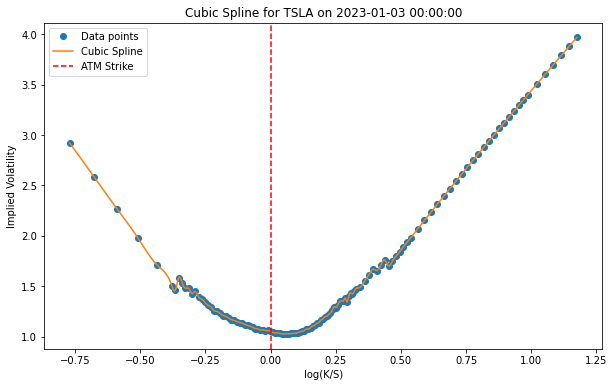

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-01-13


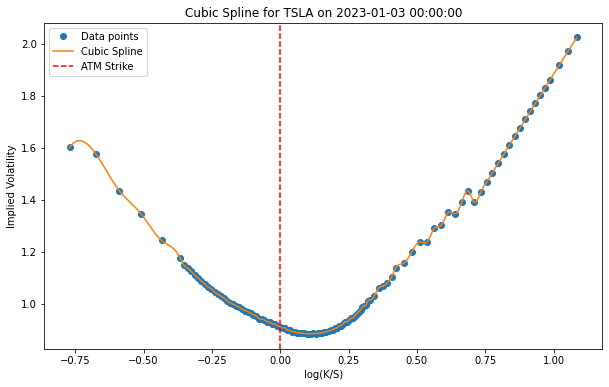

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-01-20


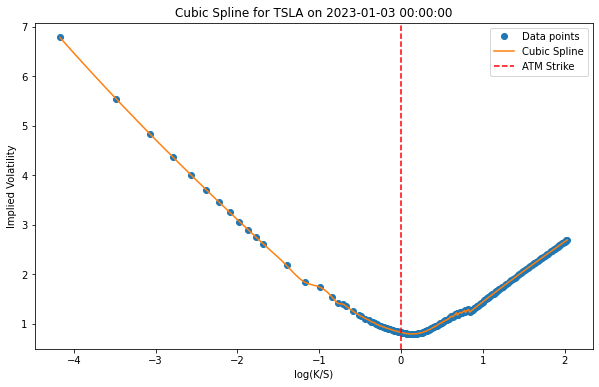

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-01-27


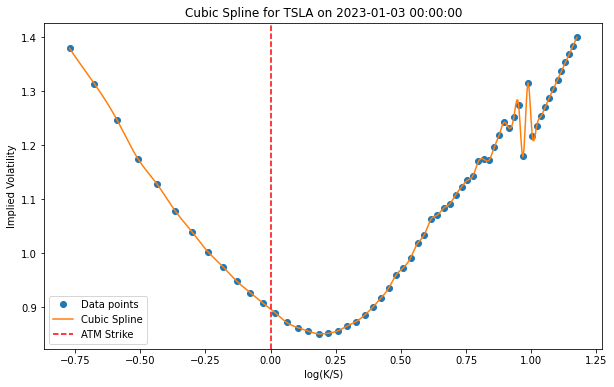

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-02-03


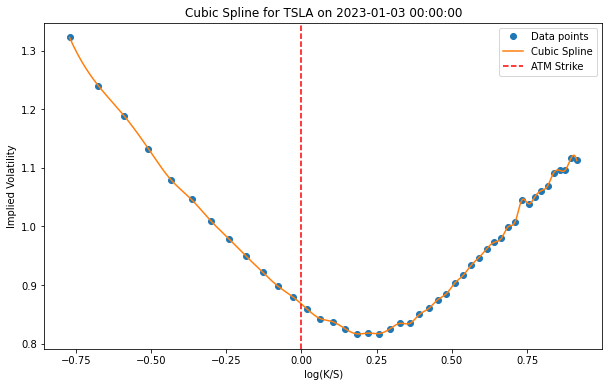

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-02-10


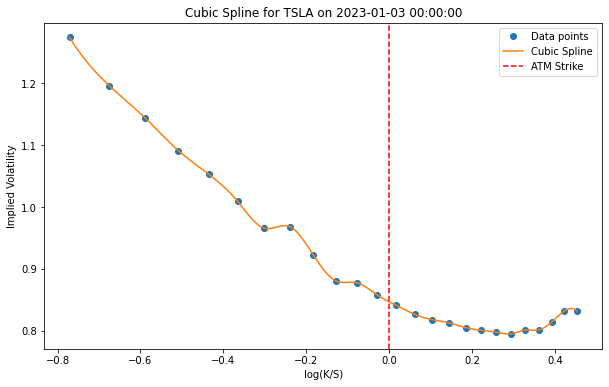

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-02-17


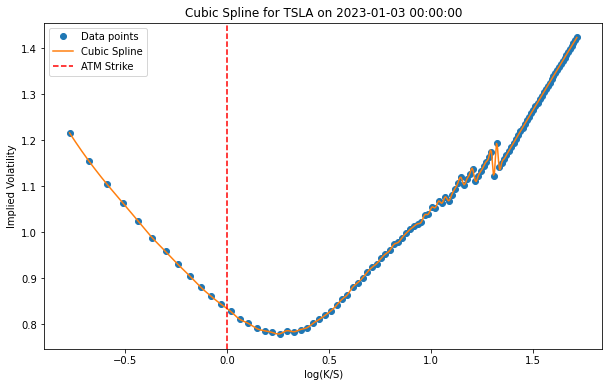

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-03-17


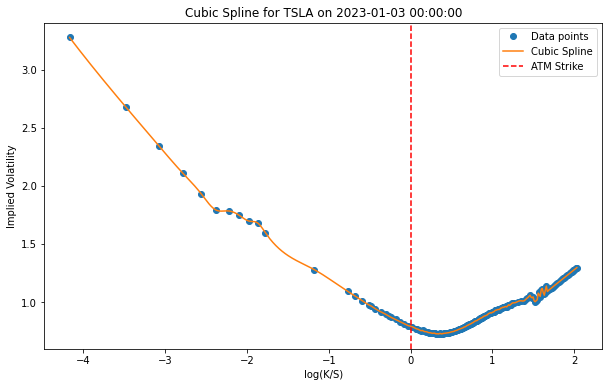

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-04-21


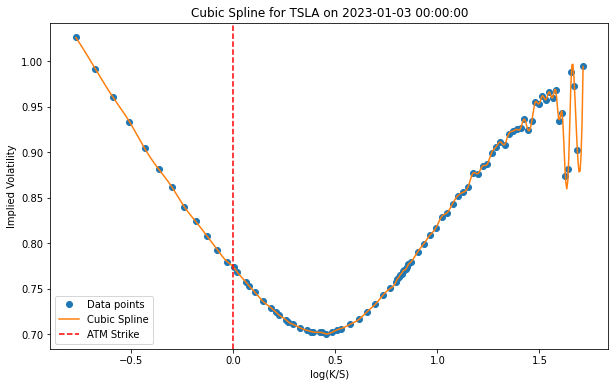

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-05-19


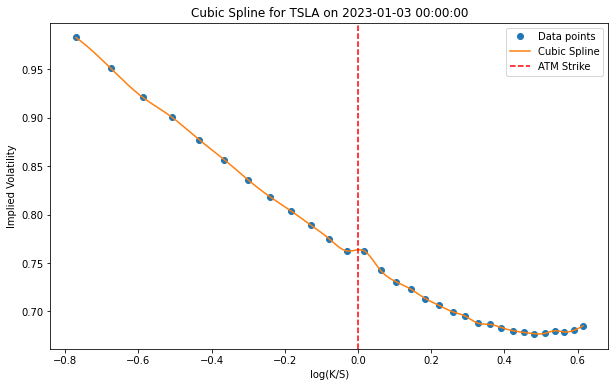

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-06-16


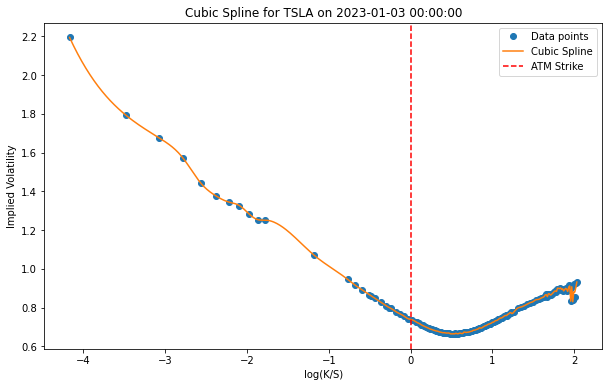

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-07-21


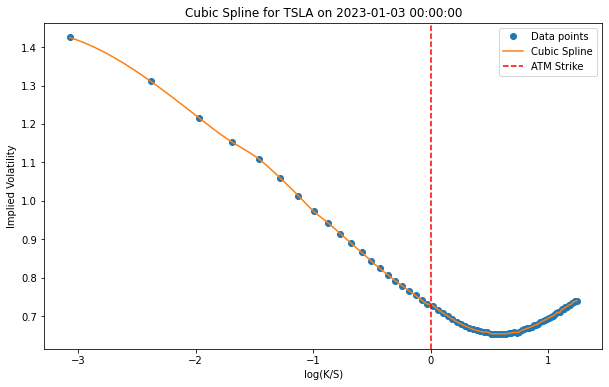

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-09-15


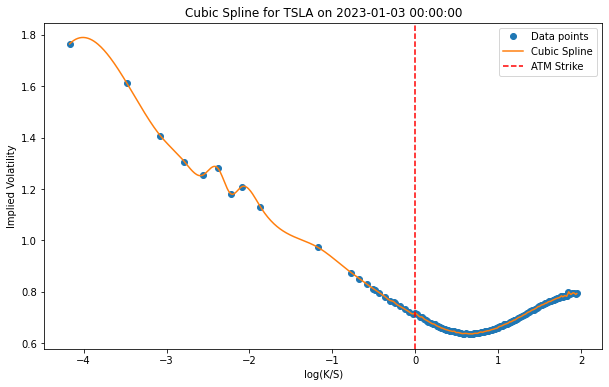

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2023-12-15


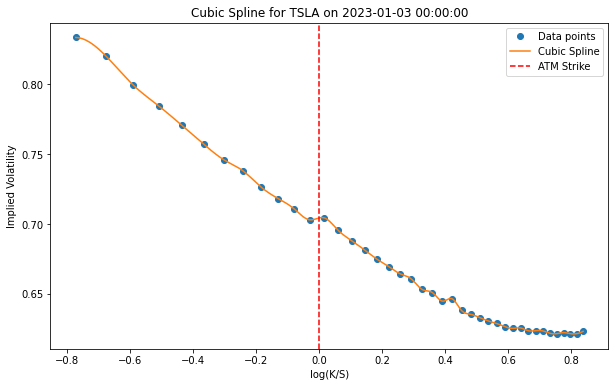

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2024-01-19


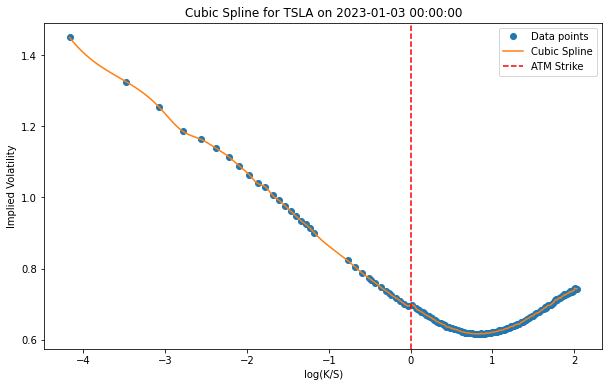

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2024-03-15


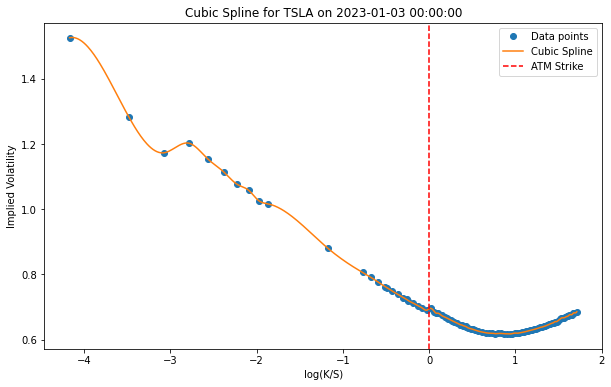

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2024-06-21


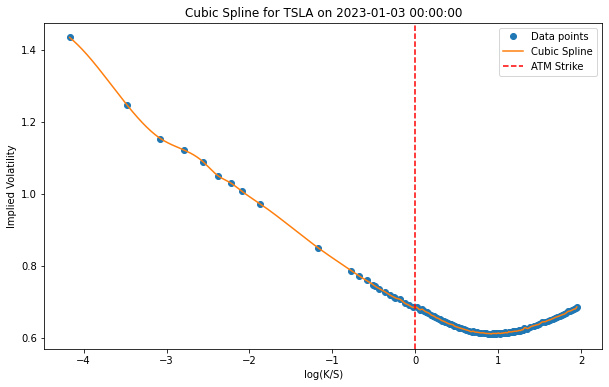

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2024-09-20


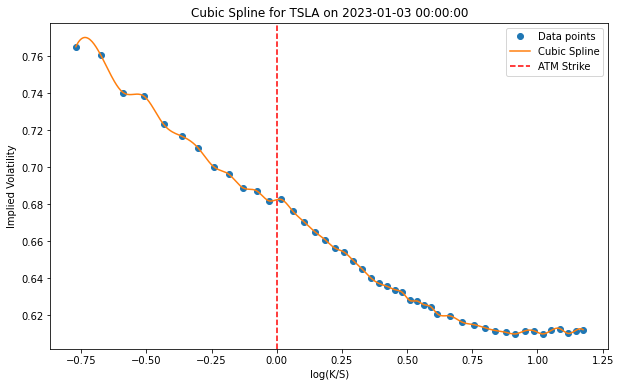

Ticker: TSLA, Date: 2023-01-03 00:00:00, Expiration: 2025-01-17


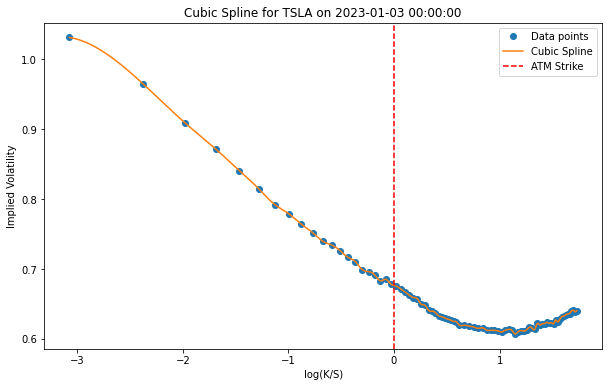

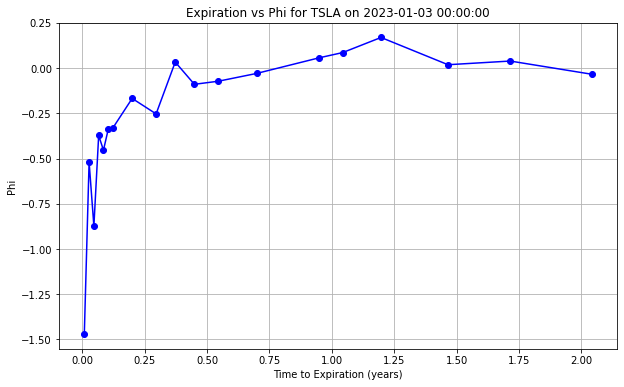

H value: 0.3859576610821206
[(0.00821917808219178, -1.4700145374391371), (0.0273972602739726, -0.5191987128396045), (0.04657534246575343, -0.8733971939161786), (0.06575342465753424, -0.3724305685203852), (0.08493150684931507, -0.4536235138641962), (0.10410958904109589, -0.3381699710189231), (0.1232876712328767, -0.3293535388543523), (0.2, -0.16761784725991835), (0.2958904109589041, -0.2530449892138782), (0.3726027397260274, 0.03352355199467738), (0.44931506849315067, -0.08948122296754817), (0.5452054794520548, -0.07239782121830589), (0.6986301369863014, -0.02943053069793411), (0.947945205479452, 0.05655624787749017), (1.0438356164383562, 0.08608227415744635), (1.1972602739726028, 0.1695250998874276), (1.4657534246575343, 0.018804245660563157), (1.715068493150685, 0.03913928140937131), (2.041095890410959, -0.03367786556507964)]


In [64]:
import pandas_market_calendars as mcal

# Get the trading calendar for NYSE
nyse = mcal.get_calendar('NYSE')




for ticker in ['TSLA']:
    stocks_data = get_stock_data(ticker, api_key)
    stocks_data.reset_index(inplace=True)
    stocks_data = stocks_data.rename(columns={'index': 'date'})
    stocks_data['Date'] = pd.to_datetime(stocks_data['date'])
    
    # print(stocks_data.shape)


    for year in range(current_year, current_year + 1):
        trading_dates = nyse.valid_days(start_date=f'{year}-01-01', end_date=f'{year}-12-31')
        series = pd.Series(trading_dates.to_pydatetime())  # Converts to a timezone-naive Series
        series = series.dt.tz_localize(None).dt.normalize()
        
        for date in series:
            print(f'Ticker: {ticker}, Date: {date}')
            options_data = get_options_data(ticker, date)
            print(options_data.shape)
          
            adjusted_close_value = stocks_data[stocks_data['Date'] == date]
            stock_price = adjusted_close_value['adjusted_close'].values[0]
            print(stock_price)
            
            h_value = get_h_value(ticker, date, stock_price, options_data)
            print(h_value)
            break
            # break



